In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.physics.continuum_mechanics.beam import Beam
sym.init_printing()
%config InlineBackend.figure_formats = ['svg']

In [2]:
a = sym.symbols('a',real=True)
x = sym.Symbol('x')
E = sym.Symbol('E')
I = sym.Symbol('I')
A_v = sym.Symbol('A_v')
A_m = sym.Symbol('A_m')
B_v = sym.Symbol('B_v')
phi_S = sym.Symbol('phi_S')
C_1, C_2, C_3, C_4 = sym.symbols('C_1 C_2 C_3 C_4')
q = A_v * sym.SingularityFunction(x, 0 , -1) + A_m * sym.SingularityFunction(x, 0, -2) + E * I * phi_S * sym.SingularityFunction(x, 5, -3) + B_v * sym.SingularityFunction(x, 10, -1) + 1 * sym.SingularityFunction(x,a, -1)
display(q)

In [3]:
V = -sym.integrate(q, x) + C_1
M = sym.integrate(V, x) + C_2
kappa = M / E / I
phi = sym.integrate(kappa, x) + C_3 + phi_S * sym.SingularityFunction(x, 5, 1)
w = -sym.integrate(phi, x) + C_4

In [4]:
Eq1 = sym.Eq(w.subs(x,0),0)
Eq2 = sym.Eq(w.subs(x,10),0)
Eq3 = sym.Eq(phi.subs(x,0),0)
Eq4 = sym.Eq(M.subs(x,0-1),0)
Eq5 = sym.Eq(M.subs(x,10+1),0)
Eq6 = sym.Eq(V.subs(x,0-1),0)
Eq7 = sym.Eq(V.subs(x,10+1),0)
Eq8 = sym.Eq((M + E * I * phi_S * sym.SingularityFunction(x, 5, -1)).subs(x,5),0) #remove infinity

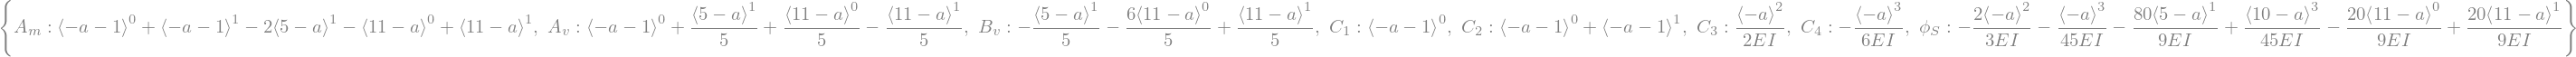

In [5]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8),(C_1,C_2,C_3,C_4,A_v,B_v,A_m,phi_S))
display(sol)

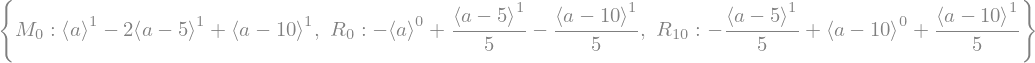

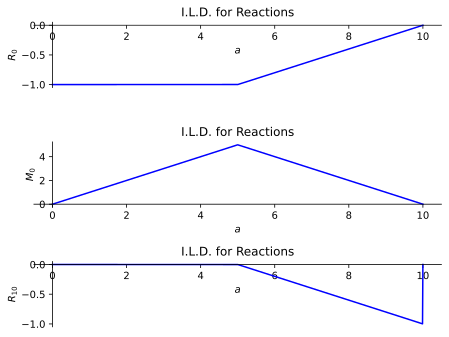

In [6]:
b = Beam(10, E, I)
M_0, R_0, R_10 = sym.symbols('M_0, R_0, R_10')
b.apply_support(0, type='fixed')
b.apply_rotation_hinge(5)
b.apply_support(10, type='pin')
#b.solve_for_reaction_loads(R_0, R_10)
#b.reaction_loads
b.solve_for_ild_reactions(1, R_0, M_0, R_10)
display(b.ild_reactions)
b.plot_ild_reactions();

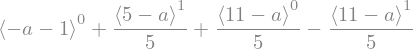

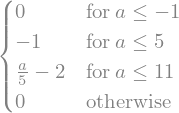

In [7]:
display(sol[A_v])
display(sol[A_v].rewrite(sym.Piecewise).simplify())

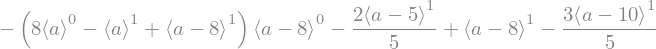

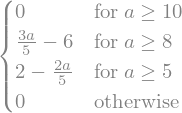

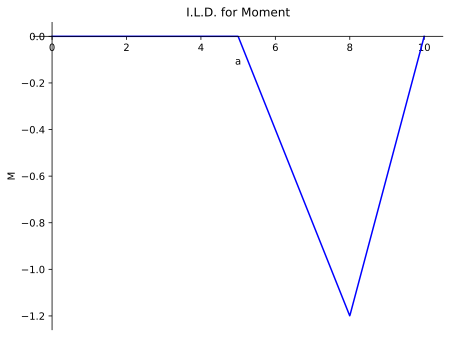

In [11]:
b.solve_for_ild_moment(8, 1, R_0, M_0, R_10)
display(b.ild_moment)
display(b.ild_moment.rewrite(sym.Piecewise).simplify())
b.plot_ild_moment();

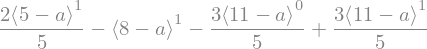

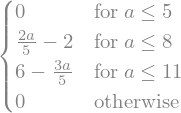

In [12]:
display(M.subs(sol).subs(x,8).simplify())
display(M.subs(sol).subs(x,8).rewrite(sym.Piecewise).simplify())

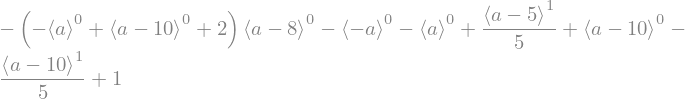

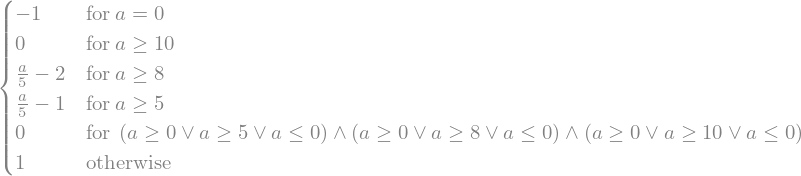

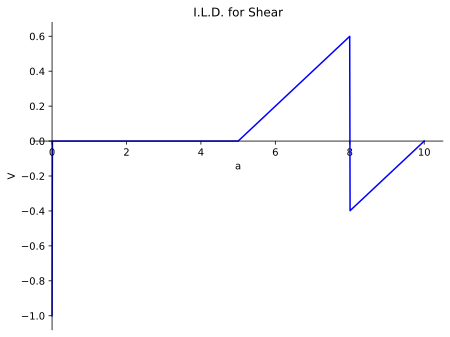

In [14]:
b.solve_for_ild_shear(8, 1, R_0, M_0, R_10)
display(b.ild_shear)
display(b.ild_shear.rewrite(sym.Piecewise).simplify())
b.plot_ild_shear();

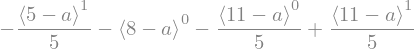

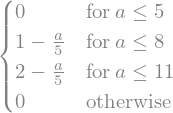

In [8]:
display(V.subs(sol).subs(x,8).simplify())
display(V.subs(sol).subs(x,8).rewrite(sym.Piecewise).simplify())